# Student_exam_oriented_ex_5_1

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [ ]:
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [1]:
import numpy as np
from local.lib.data import load_data
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
#!pip install cvxpy

In [2]:
import cvxpy as cp

## Exercise


- Algorithm: Newton and BFGS
- Problem: Binary classification using a Logistic Regression

$\underset{{\bf{w}}}{\min}f({\bf{w}})=\underset{{\bf{w}}}{\min}\left(
\frac{1}{n}\sum_{i=1}^{n} \log(1+\exp{(-y_i {\bf{w}}^T{\bf{x}}_i)}) +\frac{\lambda}{2}\left\Vert {\bf{w}}\right\Vert _{2}^{2}\right)$

- Iris dataset
    - 4 features: sepal and petal length and with of flowers
        - We use 4 features: $\bf{X}$ is a $100\times 4$ matrix containing 100 dataset entries.
    - Target: to predict the right class of the flower (Iris Setosa or Iris Versicolor)
        -  Thus, ${\bf{y}}$ is a $100\times1$ vector containing the classes
        - The dataset actually has 3 classes but we drop one to use a binary classification method.

In [3]:
#load data
X,y = load_data("classification", 1)
n,d = X.shape

In [4]:
# Constant parameters
lamb = 0.1  #regularisation parameter
Niter= 50   # Number of iterations for each algorithm

In [5]:
#cvx_solver
def solver_cvx(n,X,Y,lamb,objective_fn):
    n_columns = X.shape[1]
    w = cp.Variable(n_columns)
    lambd = cp.Parameter(nonneg=True)
    lambd.value = lamb
    problem = cp.Problem(
        cp.Minimize(objective_fn(n, X, Y, w, lambd))
    )
    problem.solve()
    return w.value

In [32]:
# Definition of the problem
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.sum(cp.logistic(cp.multiply(-Y,(X @ w))))
reg_L2 = lambda w: cp.pnorm(w, p=2)**2
loss_LS_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)

# Solution of the empirical risk using CVX
w_L2_cvx=solver_cvx(n,X,y,lamb,loss_LS_L2)

w = cp.Variable(w_L2_cvx.shape[0])
w.value = w_L2_cvx
f_cvx=loss_LS_L2(n,X,y,w_L2_cvx,lamb).value

print(f'The loss function f at the optimum takes the value {f_cvx}')

f_cvx = (np.kron(f_cvx,np.ones((1,Niter+1)))).flatten()

The loss function f at the optimum takes the value 0.24330786676806176


In [18]:
#Function that estimates the loss for several w at once.
f = lambda n, X, Y, w, lambd: (1/n)*np.sum(np.log(1+np.exp(np.diag(-Y)@(X@w))),axis=0) + (lambd/2)*np.sum(w**2,axis=0)

In [34]:
# Newton method
eta = 0.01  # learning rate
w_new=np.zeros((d,Niter+1))

for k in range(Niter):
    #Complete the code including the updating formula. Keep the weight values for all the iterations
    # Remeber that for Newton method you have to estimate the gradient and the hessian.
    
    w_new[:,k+1] = ...

f_new=f(n,X,y,w_new,lamb)

In [ ]:
# QUASI NEWTON: BFGS + line search for eta
delta=0.1
gamma=0.9
L=np.max(np.linalg.eigvals(X.T@X))+lamb
           
w_bfgs = np.zeros((d,Niter+1))
G=np.eye(d)

for k in range(Niter):
    
    # Complete the code to estimate the gradient of the cost function evaluated at w_bfgs[:,k]
    grad = grad_logistic_L2....
    
    #-------------------------------------------------------------
    # Apply Backtracking Line Search
    backtrack = 1
    etak = 1
    while backtrack == 1:
        w1 = w_bfgs[:,k] - etak * G@grad
        f1 = f(n,X,y,w1,lamb)
        f2 = f(n,X,y,w_bfgs[:,k],lamb)
        
        if etak < 1/L:  # minimum mu value
            backtrack = 0
            etak = 1/L
        elif f1 >= f2 - delta*etak*np.linalg.norm(G @ grad)**2:
            etak = etak*gamma  # Reduce eta
        else:
            backtrack = 0 # Condition fulfilled
    #-------------------------------------------------------------
    
    # Complete the code including the updating formula for the BFGS algorithm. 
    # Keep the weight values for all the iterations
    # Use the etak learning rate obtained by the previous backtracking loop
    
    w_bfgs[:,k+1] = ...
    G = ....

f_bfgs=f(n,X,y,w_bfgs,lamb)

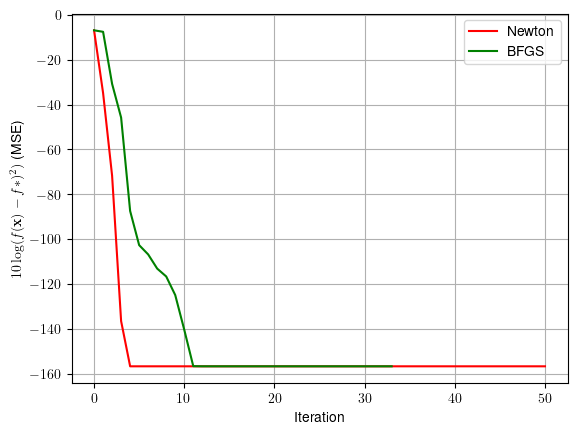

In [40]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
t = range(Niter+1)
plt.plot(t, 10*np.log10((f_new-f_cvx)**2+np.finfo(float).eps), color = 'r',label = 'Newton')
plt.plot(t, 10*np.log10((f_bfgs-f_cvx)**2+np.finfo(float).eps), color = 'g',label = 'BFGS')
plt.grid()
plt.legend()
plt.xlabel('Iteration')
plt.ylabel(r'$10\log(f({\bf{x}})-f*)^2)$ (MSE)')
plt.show()